# Explore stock data

**Context**: After downloading the stock data, we explore it.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix

# Loading stock data (stored locally)


In [2]:
def load_stock_data_locally(path:str) -> pd.DataFrame:
    '''
    This function receives a path (string) indicating where the stock data is stored locally.
    - It loads the stock data as csv file.
    - It takes Date column as index.
    - It transforms the index into Date time index.
    It returns it as a Pandas Dataframe.
    '''
    stock = pd.read_csv(path, index_col='Date')
    stock.index = pd.to_datetime(stock.index)
    return stock

In [3]:
# Retrieve stock data based on ticker and store it locally
ticker='AAPL'
path_ticker = f"../data/raw_data/{ticker}.csv"

df = load_stock_data_locally(path_ticker)
df.head()

,Close_STLA,High_STLA,Low_STLA,Open_STLA,Volume_STLA
Date,,,,,
2023-02-15,14.593234,14.644709,14.421649,14.421649,4086600
2023-02-16,14.533180,14.696184,14.438808,14.438808,4418800
2023-02-17,14.833453,14.833453,14.481704,14.567497,6618000
2023-02-21,14.292961,14.584654,14.284382,14.541759,6751000
2023-02-22,14.816294,15.013615,14.704763,14.704763,9501200


# Quick exploration


In [4]:
def explore(df:pd.DataFrame):
    '''
    This function receives a Pandas Dataframe.
     It returns : 
     - the shape of the input dataframe
     - the dataframe head
     - the columns of the input dataframe
     - the informations of the input dataframe
     - the statisticsof the input dataframe
     - the histograms of the input dataframe
    '''
    # Shape
    print("---"*30) #decorator
    print(f"Shape: {df.shape}")     
    
    # Head
    print("---"*30)  #decorator
    display(df.head())
        
    # Columns
    print("---"*30)  #decorator 
    print(f"Columns: {df.columns}")
    
    # Informations
    print("---"*30)  #decorator
    print(df.info())    
    
    # Statistics
    print("---"*30)  #decorator
    display(df.describe())
    
    # Data histograms
    print("---"*30)  #decorator
    df.hist(bins = 50, figsize = (25,10), xlabelsize=0)
    plt.show()  

------------------------------------------------------------------------------------------
Shape: (502, 5)
------------------------------------------------------------------------------------------


,Close_STLA,High_STLA,Low_STLA,Open_STLA,Volume_STLA
Date,,,,,
2023-02-15,14.593234,14.644709,14.421649,14.421649,4086600
2023-02-16,14.533180,14.696184,14.438808,14.438808,4418800
2023-02-17,14.833453,14.833453,14.481704,14.567497,6618000
2023-02-21,14.292961,14.584654,14.284382,14.541759,6751000
2023-02-22,14.816294,15.013615,14.704763,14.704763,9501200


------------------------------------------------------------------------------------------
Columns: Index(['Close_STLA', 'High_STLA', 'Low_STLA', 'Open_STLA', 'Volume_STLA'], dtype='object')
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-02-15 to 2025-02-14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_STLA   502 non-null    float64
 1   High_STLA    502 non-null    float64
 2   Low_STLA     502 non-null    float64
 3   Open_STLA    502 non-null    float64
 4   Volume_STLA  502 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB
None
------------------------------------------------------------------------------------------


,Close_STLA,High_STLA,Low_STLA,Open_STLA,Volume_STLA
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,17.809902,17.953744,17.673435,17.818878,6.704836e+06
std,3.794975,3.812306,3.774151,3.797776,3.307450e+06
min,12.330000,12.360000,12.120000,12.270000,1.880100e+06
25%,15.041811,15.168041,14.912311,15.039353,4.648300e+06
50%,17.023920,17.197060,16.874177,17.112831,5.975450e+06
75%,20.566279,20.687947,20.363798,20.447501,7.956000e+06
max,27.515295,27.618244,27.215811,27.534014,3.350010e+07


------------------------------------------------------------------------------------------


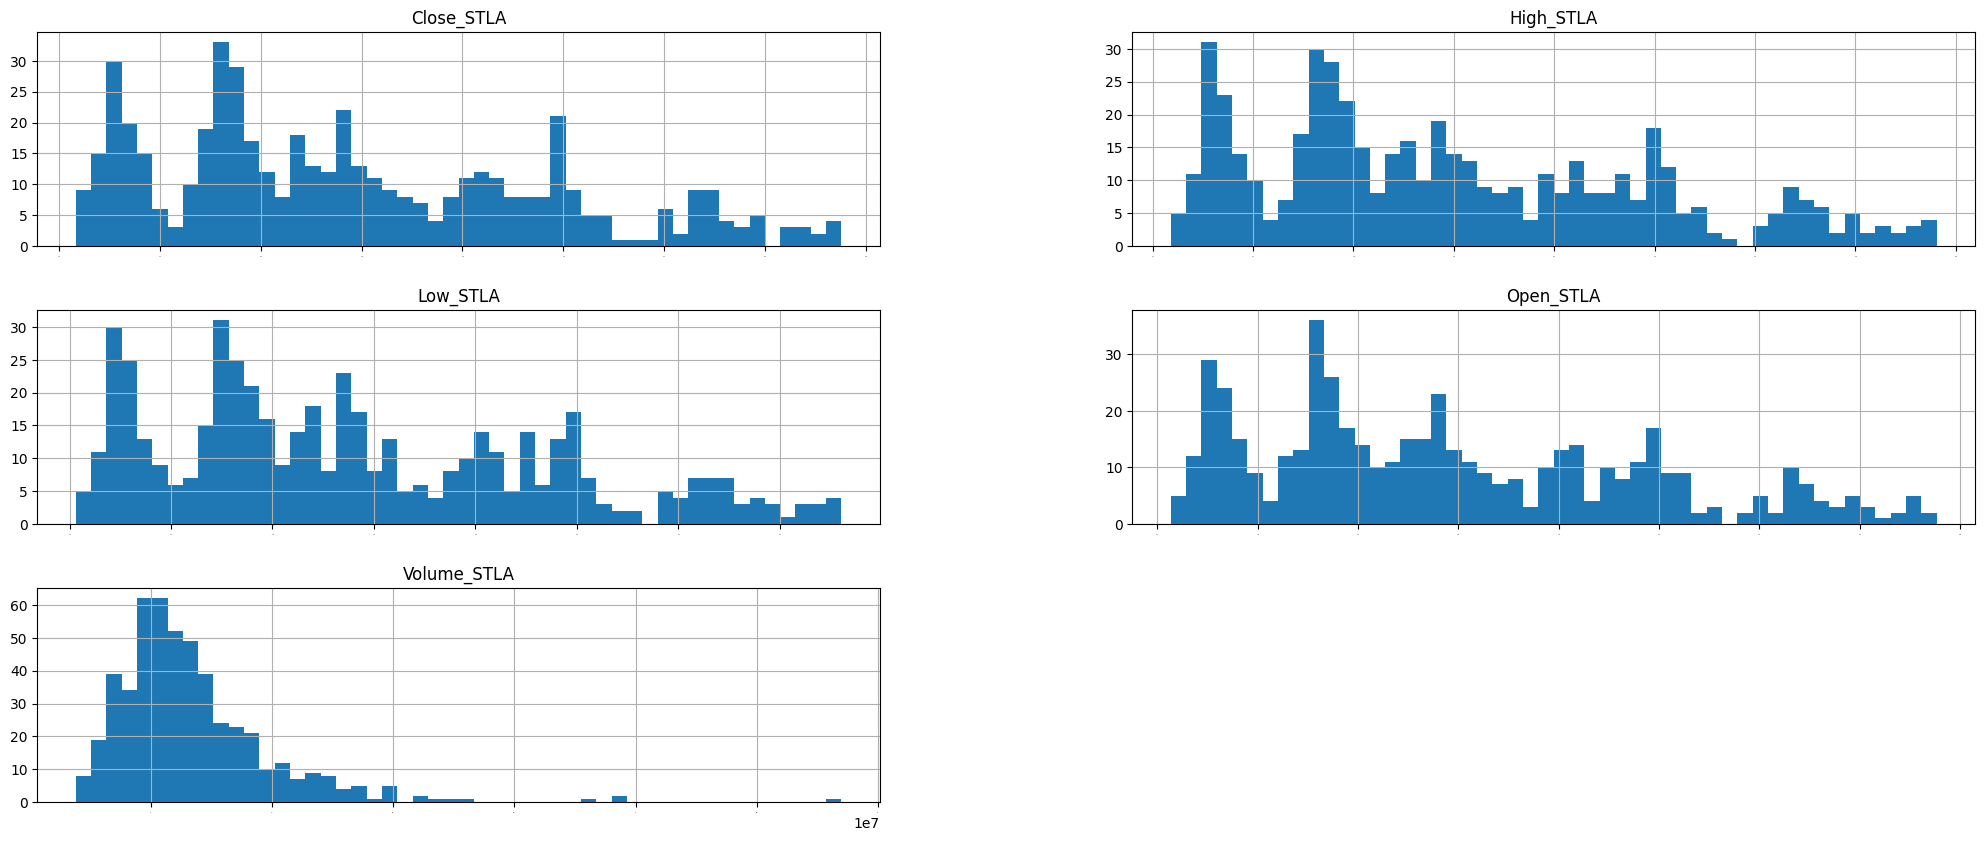

In [5]:
# Quick exploration of stock data
explore(df)

# Visualization

## Histograms and Boxplots


In [6]:
def plot_hist_box(df:pd.DataFrame):
    '''
    This function receives a Pandas Dataframe.
    - It selects the numerical features in the input dataframe.
    - It plots histograms and boxplots for each numerical feature of input dataframe.
    '''     
    # Numerical Features
    numerical_features = df.select_dtypes(include = 'number').columns.values.tolist()

    #Parameters     
    ncol_max = 2
    nrow_max = len(numerical_features)   
    
    #Figure settings
    fig, axs = plt.subplots(nrows = nrow_max, ncols = ncol_max, figsize=(15, 14))

    # Flatten axes for easy iteration
    axs = axs.flatten()
    
    #Parameter to index axs     
    ax_index = 0
    
    for col in numerical_features:  
        # Plotting the histograms
        sns.histplot(data = df[numerical_features], x= col, kde = True, ax=axs[ax_index], bins = 50)   

        # Plotting the boxplots
        sns.boxplot(data = df[numerical_features], x= col, ax=axs[ax_index+1])
        
        # Formatting
        axs[ax_index].set_xlabel(col)
        axs[ax_index].set_title(f'Hist Plot - {col}')  
        axs[ax_index+1].set_xlabel(col)
        axs[ax_index+1].set_title(f'Box Plot - {col}')  

        # Incrementing
        ax_index +=2
        
        # Adjust spacing between subplots
        plt.subplots_adjust(wspace=0.3, hspace=0.8)  # wspace (width), hspace (height)
        

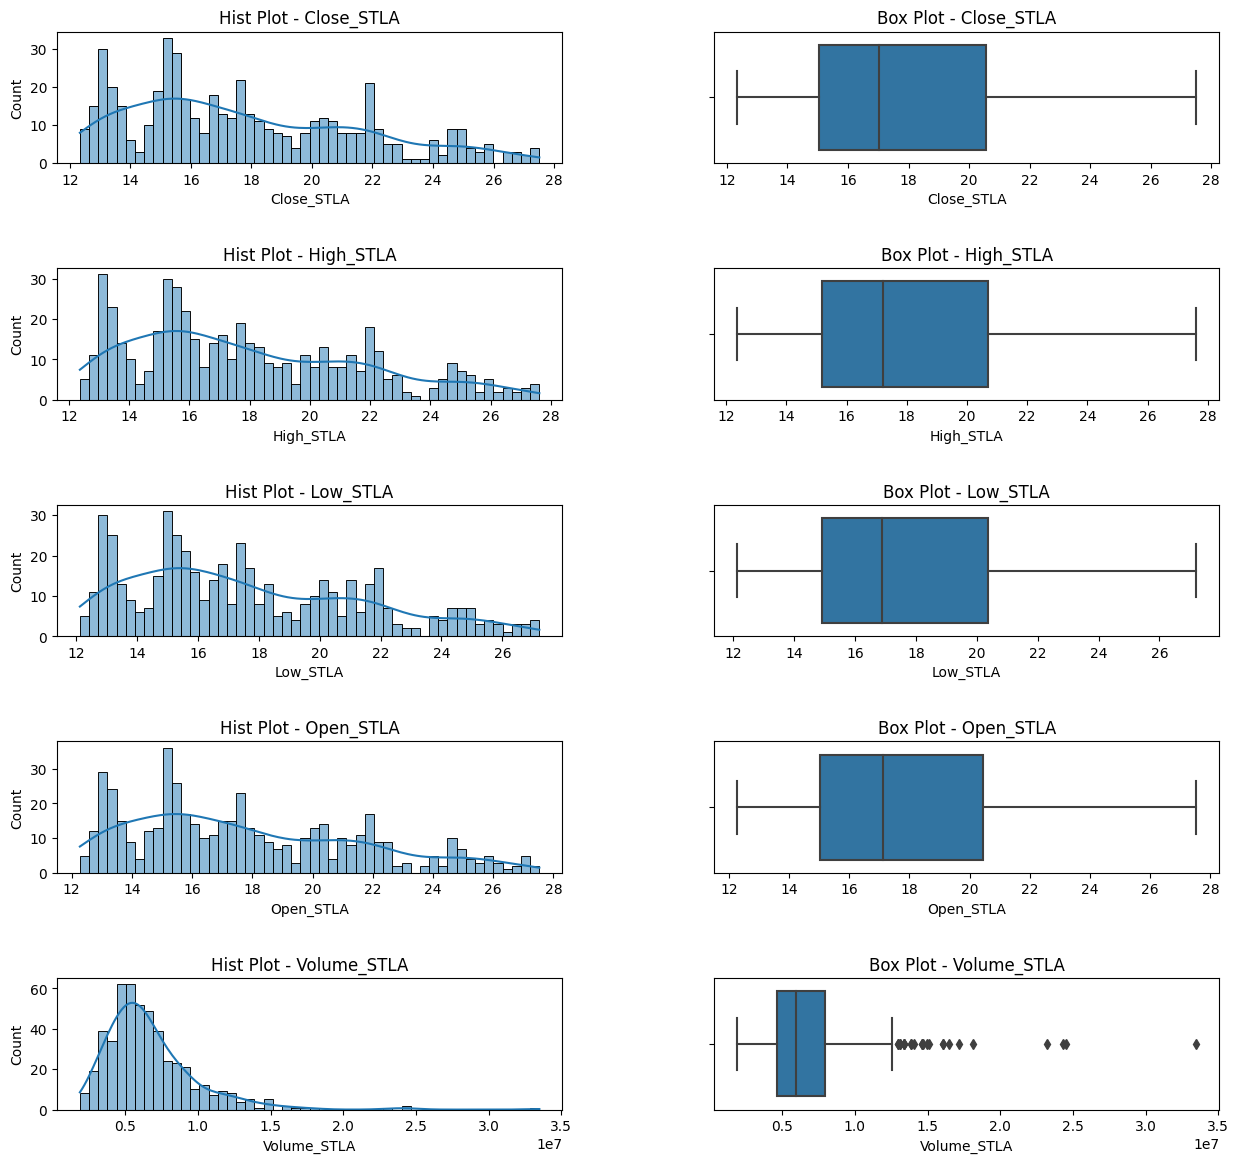

In [7]:
# Histograms and boxplots of stock data
plot_hist_box(df)

## Lineplots

In [8]:
def plot_lines(df:pd.DataFrame):
    '''
    This function receives a Pandas Dataframe.
    - It selects the numerical features in the input dataframe.
    - It plots lineplots for each numerical feature of input dataframe.
    '''     
    # Numerical Features
    numerical_features = df.select_dtypes(include = 'number').columns.values.tolist()

    #Parameters     
    ncol_max = 1
    nrow_max = len(numerical_features)   
    
    #Figure settings
    fig, axs = plt.subplots(nrows = nrow_max, ncols = ncol_max, figsize=(8, 15))

    # Flatten axes for easy iteration
    axs = axs.flatten()
    
    for index, col in enumerate(numerical_features):  
        # Plotting the histograms
        sns.lineplot(data = df[numerical_features], y= col, x=df.index,  ax=axs[index])   
        
        # Formatting
        axs[index].set_xlabel(col)
        axs[index].set_title(f'Line Plot - {col}')  
        
        # Adjust spacing between subplots
        plt.subplots_adjust(wspace=0.3, hspace=0.8)  # wspace (width), hspace (height)     

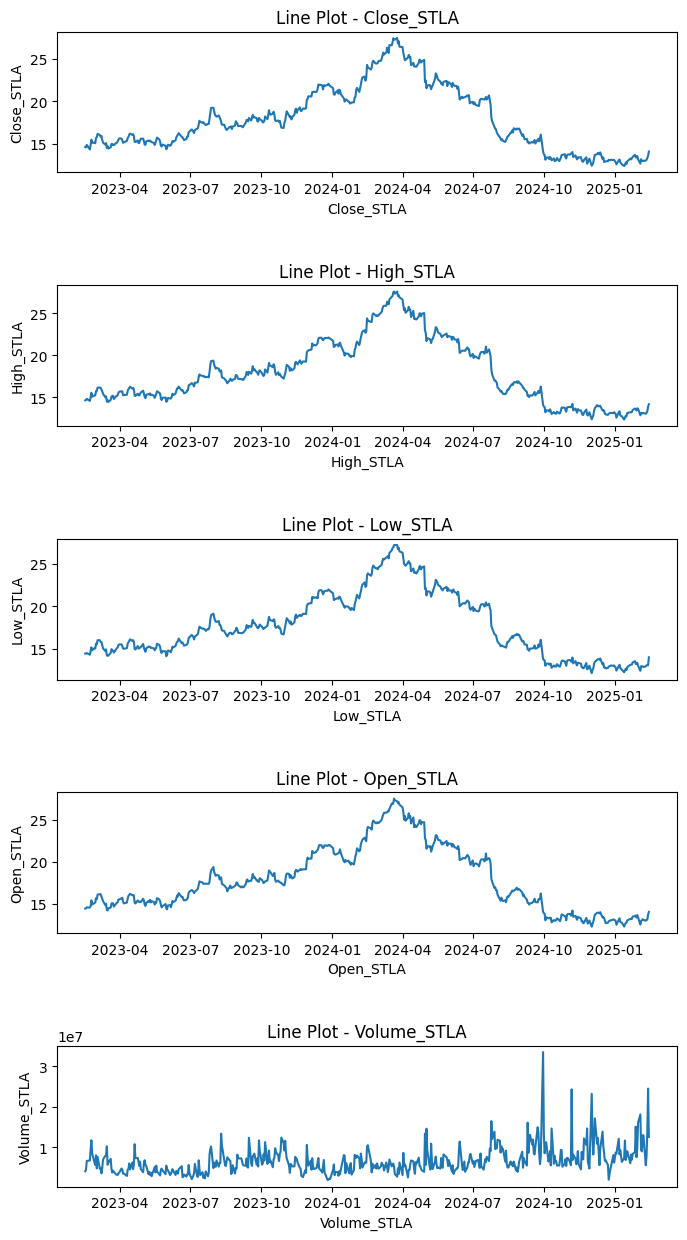

In [9]:
# Lineplots of stock data
plot_lines(df)    